# GIS Programming and Databases
## Assignment 1b

NAME: Grey Harris

ID: 97774899

Due: Monday, 7th of March 2022, 10:00pm

## Imports

In [1]:
import xarray as xr
import numpy as np # you can use numpy functions with xarray objects
import salem # this will help with plotting/projection 
import cartopy.crs as ccrs # an alternative way to handle plotting/projection yourself
import matplotlib.pyplot as plt
from numpy import sqrt as sq
from numpy import mean as avg
from math import ceil

In [2]:
def load_dataset(t, x="20200101000000"):
    """
    Data loading fucntion, defaults jan 2020
    t: data type
    x: date
    returns xr dataset
    """
    path = "/mnt/data/MetService_WRF/"
    return xr.open_dataset(path + t + "_" + x + ".nc")

## Task 1

The first function you will build should be able to read the U and V wind velocity variables from
the WRF Netcdf files for the month of January 2020 and perform a monthly average wind
speed calculation. The U (V) velocity are the west-to-east (south-to-north) components of the
wind velocity vector and are extracted at multiple height levels. For this function, use one
height level calculation at 10m above ground level and make sure you return the wind speed
output. Call this function ws_monthavg_10m.

In [3]:
# Load data from Jan 2020
vel_v = load_dataset("V")
vel_u = load_dataset("U")

### 1a, Calculate the windspeed based on the equation: WS = √U**2 + V**2

In [4]:
vel_v.height # index 0 is 10m

<xarray.DataArray 'height' (height: 10)>
array([ 10.,  20.,  30.,  40.,  50.,  80., 100., 120., 150., 200.])
Coordinates:
  * height   (height) float64 10.0 20.0 30.0 40.0 ... 100.0 120.0 150.0 200.0

In [5]:
vel_v

<xarray.Dataset>
Dimensions:  (time: 744, lat: 508, lon: 472, height: 10)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-01-31T23:00:00
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
  * height   (height) float64 10.0 20.0 30.0 40.0 ... 100.0 120.0 150.0 200.0
Data variables:
    V        (height, time, lat, lon) float32 ...

In [6]:
index_10m = 0
vel_v_10m = vel_v.V[index_10m, :, :, :] ** 2 # square values in array
vel_u_10m = vel_u.U[index_10m, :, :, :] ** 2 # square values in array

In [7]:
uv_added = vel_v_10m + vel_u_10m # add the two squared arrays
result = sq(vel_v.V[index_10m, :, :, :] ** 2 + vel_u.U[index_10m, :, :, :] ** 2) # calculate the combined wind speed
print(result[0][0][0]) # checking first entry to sanity check

<xarray.DataArray ()>
array(7.213507, dtype=float32)
Coordinates:
    time     datetime64[ns] 2020-01-01
    lat      float64 -48.0
    lon      float64 166.0
    height   float64 10.0


### 1b, Average across time for the entire month after you calculate the wind speed

In [8]:
# figuring out how to avg month
# ws_monthavg_10m = avg(ws_month, axis=0) 

In [9]:
def ws_monthavg_10m(v,u):
    """Calculates avg windsepeed for a month using u,v windspeeds"""
    return avg(sq(v.V[index_10m, :, :, :] ** 2 + u.U[index_10m, :, :, :] ** 2), axis=0)

### 1c, Return your monthly averaged wind speed

In [10]:
monthly_avg_wind_speed = ws_monthavg_10m(vel_v, vel_u)
type(monthly_avg_wind_speed)
monthly_avg_wind_speed

<xarray.DataArray (lat: 508, lon: 472)>
array([[9.945411 , 9.949885 , 9.950336 , ..., 7.169188 , 7.16389  ,
        7.161511 ],
       [9.9257145, 9.930447 , 9.93355  , ..., 7.1586165, 7.150105 ,
        7.1454053],
       [9.906356 , 9.912076 , 9.91636  , ..., 7.149594 , 7.144263 ,
        7.142824 ],
       ...,
       [4.770513 , 4.7658863, 4.766819 , ..., 5.894616 , 5.890496 ,
        5.881771 ],
       [4.7690816, 4.765195 , 4.760821 , ..., 5.883497 , 5.8813024,
        5.8727436],
       [4.755022 , 4.752947 , 4.750719 , ..., 5.869205 , 5.865661 ,
        5.8580585]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -48.0 -47.97 -47.94 -47.92 ... -34.06 -34.03 -34.01
  * lon      (lon) float64 166.0 166.0 166.1 166.1 ... 178.9 178.9 179.0 179.0
    height   float64 10.0

## Task 2

The second function is a plotting function. Continue in the same notebook to build a new
function that will take the wind speed output of the first function and produce a filled contour
map of the wind speed over New Zealand at 10m above ground level. This function should be
flexible enough to allow the user to enter a colormap of choice and a plotting range of wind
speed values . Call this function ws_monthavg10m_map
Tips: 

### 2a, Make sure you to use a geographic projection and add coastlines to your plot

In [11]:
def ws_monthavg10m_map(ary, cmap="Paired", w_range=False, ax=None):
    """
    creates contour map of windspeed of nz
    ary: array of avg windspeeds
    cmap: colour map for plotting
    w_range: tuple of (min,max) values to threshold map
    result: projection of windspeeds
    """
    if w_range:
        ary.salem.quick_map(cmap=cmap, vmin=w_range[0],vmax=w_range[1])
    else:
        ary.salem.quick_map(cmap=cmap, ax=ax)

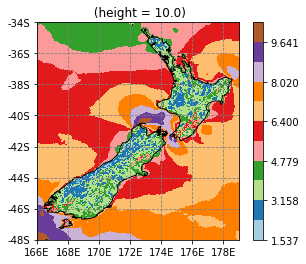

In [12]:
ws_monthavg10m_map(monthly_avg_wind_speed) # default map

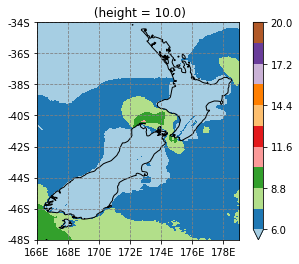

In [13]:
ws_monthavg10m_map(monthly_avg_wind_speed, w_range=(6,20)) # Change range

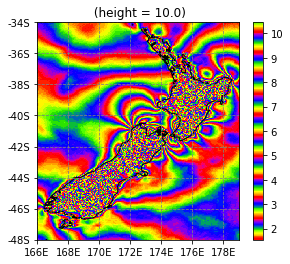

In [14]:
ws_monthavg10m_map(monthly_avg_wind_speed, cmap='prism') # Change colour 

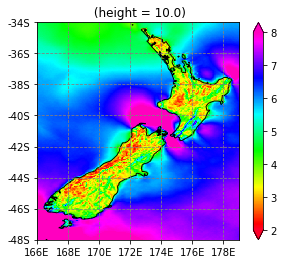

In [15]:
ws_monthavg10m_map(monthly_avg_wind_speed, cmap="gist_rainbow", w_range=(2,8)) # Change colour and range

## Above shows coastlines and map creation works, 

## Below will be orthographic projections on section of world map

In [16]:
def orthoplotter(ary, cmap="Paired", w_range=False, dpi=False, ax=None):
    """
    creates ortho map of windspeed of nz
    ary: array of avg windspeeds
    cmap: colour map for plotting
    w_range: tuple of (min,max) values to threshold map
    result: projection of windspeeds
    """
    ax = plt.axes(projection=ccrs.Orthographic(170, -45))
    ax.set_global();
    if w_range:
        ary.plot(ax=ax, transform=ary.salem.cartopy(), cmap=cmap, vmin=w_range[0], vmax=w_range[1])
    else:
        ary.plot(ax=ax, transform=ary.salem.cartopy(), cmap=cmap)
    if dpi:
        fig.set_dpi(dpi)
    ax.coastlines();
    ax.set_extent((140,-170,-20,-50))
    ax.stock_img() #must be after everything

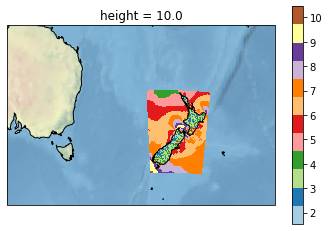

In [17]:
orthoplotter(monthly_avg_wind_speed) # base map

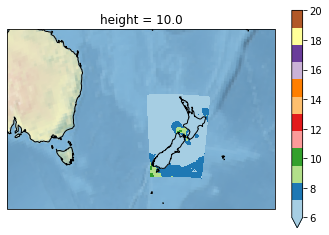

In [18]:
orthoplotter(monthly_avg_wind_speed, w_range=(6,20)) # ammend range

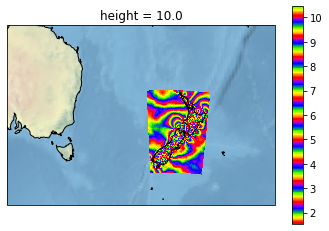

In [19]:
orthoplotter(monthly_avg_wind_speed, cmap='prism') # change color

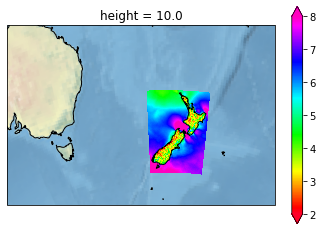

In [20]:
orthoplotter(monthly_avg_wind_speed, cmap="gist_rainbow", w_range=(2,8)) # Change colour and range

# Below is me trying to make an auto grid plotter, but not sure where im going wrong

In [21]:
#https://towardsdatascience.com/creating-custom-plotting-functions-with-matplotlib-1f4b8eba6aa1

In [22]:
# fig, axs = plt.subplots(2, 2, constrained_layout=True)
# for ax in axs.flat:
#     example_plot(ax)

In [23]:
vals = [(monthly_avg_wind_speed, {}), \
        (monthly_avg_wind_speed, {"w_range":(6,20)}), \
        (monthly_avg_wind_speed, {"cmap":'prism'}), \
        (monthly_avg_wind_speed, {"cmap":"gist_rainbow", "w_range":(2,8)})]

In [24]:
def ws_monthavg10m_map_v2(ary, cmap="Paired", w_range=False, dpi=False, ax=None):
    """
    creates contour map of windspeed of nz
    ary: array of avg windspeeds
    cmap: colour map for plotting
    w_range: tuple of (min,max) values to threshold map
    result: projection of windspeeds
    """
    if w_range:
        if ax:
            ax.ary.salem.quick_map(cmap=cmap, vmin=w_range[0],vmax=w_range[1])
        else:
            ary.salem.quick_map(cmap=cmap, vmin=w_range[0],vmax=w_range[1])
    else:
        if ax:
            ax.ary.salem.quick_map(cmap=cmap, ax=ax)
        else:
            ary.salem.quick_map(cmap=cmap, ax=ax)
    if dpi:
        fig.set_dpi(150)

In [25]:
def plotmaker(plotter, args, figsize=(16,16)):
    """plots all maps in (2,maps/2) grid"""
    width, height = 2, ceil(len(maps)/2) #get width and height for array
    fig, axes = plt.subplots(width,height,constrained_layout=True,figsize=figsize)
    axs = axes.ravel()
    for i, ax in enumerate(axs):
        a, b = args[i]
        plotter(a, ax=ax, **b)

In [26]:
plotmaker(ws_monthavg10m_map_v2, vals, figsize=(16,16))

NameError: name 'maps' is not defined